In [3]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')
X = [[1, 3, 2]]
enc.fit(X)

OneHotEncoder(categorical_features='all', dtype=<class 'numpy.float64'>,
       handle_unknown='ignore', n_values='auto', sparse=True)

In [5]:
import pandas as pd

In [13]:
pd.get_dummies(pd.Series(list("abcdefg")))["a"].tolist()

[1, 0, 0, 0, 0, 0, 0]

In [14]:
a = [1, 0, 0, 0, 0, 0, 0]

In [18]:
"".join([str(x) for x in a])

'1000000'

In [45]:
def one_hot_encoder(x):
    tmp = pd.get_dummies(x)
#         tmp = pd.get_dummies(pd.Series(x))[item].tolist()
    return "".join([str(x) for x in tmp])

In [19]:
import pandas as pd
import numpy as np
import calendar
import datetime
from datetime import datetime
from sklearn.preprocessing import OneHotEncoder
import requests

In [20]:
df = pd.read_csv("./data/filter_time_data.txt", sep='\t\t', header=None)

/home/wujiaocan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [35]:
df.columns = [ '电影ID','时间', '当前热度值', '新增热度值','当前点击量','新增点击量','当前评论数','新增评论数','当前点赞数','新增点赞数',
            '当前踩数','新增踩数','当前评分数','推广位','影片推广位等级','当前小时弹幕数','当前小时新增弹幕数','当前小时评分人数',
            '当前小时新增评分人数','当前小时五星评分人数','当前小时四星评分人数','当前小时三星评分人数','当前小时二星评分人数',
            '当前小时一星评分人数','当日爱奇艺播放指数','影片上线时间','导演','编剧','制片','美术','主演']

In [85]:
df.head(100)

,电影ID,时间,当前热度值,新增热度值,当前点击量,新增点击量,当前评论数,新增评论数,当前点赞数,新增点赞数,...,当前小时三星评分人数,当前小时二星评分人数,当前小时一星评分人数,当日爱奇艺播放指数,影片上线时间,导演,编剧,制片,美术,主演
0,4,2018-09-04 18:00:00,2813.0,-1.0,8986157.0,481.0,412.0,0.0,978.0,0.0,...,-111111111.0,-111111111.0,-111111111.0,13938.0,2017-03-17 18:50:39,喇英,"喇英,翁颖宗",余泳妮,NaN,"刘京永,李司隆,杨凡,喇英"
1,4,2018-09-04 19:00:00,2811.0,-2.0,8987183.0,1026.0,412.0,0.0,978.0,0.0,...,-111111111.0,-111111111.0,-111111111.0,13938.0,2017-03-17 18:50:39,喇英,"喇英,翁颖宗",余泳妮,NaN,"刘京永,李司隆,杨凡,喇英"
2,4,2018-09-04 20:00:00,2810.0,-1.0,8987387.0,204.0,412.0,0.0,978.0,0.0,...,-111111111.0,-111111111.0,-111111111.0,13938.0,2017-03-17 18:50:39,喇英,"喇英,翁颖宗",余泳妮,NaN,"刘京永,李司隆,杨凡,喇英"
3,4,2018-09-04 21:00:00,2809.0,-1.0,8988308.0,921.0,412.0,0.0,978.0,0.0,...,-111111111.0,-111111111.0,-111111111.0,13938.0,2017-03-17 18:50:39,喇英,"喇英,翁颖宗",余泳妮,NaN,"刘京永,李司隆,杨凡,喇英"
4,4,2018-09-04 22:00:00,2805.0,-4.0,8990561.0,2253.0,412.0,0.0,978.0,0.0,...,-111111111.0,-111111111.0,-111111111.0,13938.0,2017-03-17 18:50:39,喇英,"喇英,翁颖宗",余泳妮,NaN,"刘京永,李司隆,杨凡,喇英"
5,4,2018-09-04 23:00:00,2804.0,-1.0,8991526.0,965.0,412.0,0.0,978.0,0.0,...,-111111111.0,-111111111.0,-111111111.0,13938.0,2017-03-17 18:50:39,喇英,"喇英,翁颖宗",余泳妮,NaN,"刘京永,李司隆,杨凡,喇英"
6,4,2018-09-05 00:00:00,2799.0,-5.0,8993573.0,2047.0,412.0,0.0,978.0,0.0,...,-111111111.0,-111111111.0,-111111111.0,11009.0,2017-03-17 18:50:39,喇英,"喇英,翁颖宗",余泳妮,NaN,"刘京永,李司隆,杨凡,喇英"
7,4,2018-09-05 01:00:00,2797.0,-2.0,8994040.0,467.0,412.0,0.0,978.0,0.0,...,-111111111.0,-111111111.0,-111111111.0,11009.0,2017-03-17 18:50:39,喇英,"喇英,翁颖宗",余泳妮,NaN,"刘京永,李司隆,杨凡,喇英"
8,4,2018-09-05 02:00:00,2797.0,0.0,8994887.0,847.0,412.0,0.0,978.0,0.0,...,-111111111.0,-111111111.0,-111111111.0,11009.0,2017-03-17 18:50:39,喇英,"喇英,翁颖宗",余泳妮,NaN,"刘京永,李司隆,杨凡,喇英"
9,4,2018-09-05 03:00:00,2795.0,-2.0,8995103.0,216.0,413.0,1.0,982.0,4.0,...,-111111111.0,-111111111.0,-111111111.0,11009.0,2017-03-17 18:50:39,喇英,"喇英,翁颖宗",余泳妮,NaN,"刘京永,李司隆,杨凡,喇英"


In [60]:
all_director = []
for words in set(df['导演'].tolist()):
    if len(str(words)) > 1:
        all_director.extend(str(words).split(","))
    else:
        all_director.append(words)

In [63]:
# all_director

In [74]:
len(set(all_director))

3077

In [64]:
all_scriptwriter = []
for words in set(df['编剧'].tolist()):
    if len(str(words)) > 1:
        all_scriptwriter.extend(str(words).split(","))
    else:
        all_scriptwriter.append(words)

In [73]:
len(set(all_scriptwriter))

2122

In [67]:
# all_scriptwriter

In [68]:
all_producer = []
for words in set(df['制片'].tolist()):
    if len(str(words)) > 1:
        all_producer.extend(str(words).split(","))
    else:
        all_producer.append(words)

In [72]:
len(set(all_producer))

3801

In [75]:
# set(all_producer)

In [76]:
all_leading_artist = []
for words in set(df['主演'].tolist()):
    if len(str(words)) > 1:
        all_leading_artist.extend(str(words).split(","))
    else:
        all_leading_artist.append(words)

In [78]:
len(set(all_leading_artist))

3707

In [81]:
# df['主演']

In [79]:
set(all_leading_artist)

{'',
 '陈熙文',
 '施予斐',
 '韩瑞',
 '田爽',
 '赵君',
 '王小天',
 '张闯',
 '周刚',
 '谢晓东',
 '单国照',
 '宋飞',
 '王瑜',
 '辛一',
 '陈熙明',
 '李月',
 '陈春',
 '曹勇',
 '刘宏伟',
 '尹佳秋',
 '李娜',
 '秦煌',
 '成敏',
 '陈浩',
 '高阳',
 '张莹',
 '阿郎',
 '王子君',
 '王可',
 '任学海',
 '大雄',
 '刘刚',
 '李恒建',
 '吴道翔',
 '秦琴',
 '张星',
 '郑庆方',
 '李远',
 '明道',
 '李晓晖',
 '孔琛亮',
 '闻婷',
 '吴琪',
 '李华',
 '陈翔',
 '杨悦',
 '许栩',
 '张昊',
 '黄圣依',
 '赵海燕',
 '武思明',
 '谭博华',
 '小宝',
 '何德瑞',
 '刘萌萌',
 '安俊杰',
 '贝贝',
 '俞赵楹',
 '徐守波',
 '陈渝陈',
 '李正伟',
 '方放',
 '郑彬',
 '范家其',
 '郑英基',
 '吴恒',
 '李安格',
 '周圣博',
 '胥明文',
 '詹发盛',
 '黄建',
 '刘东健',
 '牛嵘',
 '曾晨',
 '白洁',
 '蓝正龙',
 '何佳宣',
 '何雨桐',
 '刘发星',
 '广帅',
 '李可',
 '代永涛',
 '云峰',
 '王丽',
 '阿杰',
 '汪衍君',
 '赵天宇',
 '徐伟栋',
 '胡乃青',
 '洪芳',
 '宋斌伟',
 '吴启华',
 '刘伟',
 '张雅楠',
 '杜克海',
 '文龙',
 '丁一',
 '任超',
 '徐明哲',
 '刘金龙',
 '黄煜琪',
 '董霞',
 '李国鸿',
 '尤亦泽',
 '刘晓红',
 '李晓灵',
 '张志明',
 '石瀚文',
 '阿兰',
 '高杰',
 '任盈盈',
 '伍娇',
 '张思睿',
 '邹建文',
 '李宁宁',
 '杨静',
 '杜鹃',
 '王偲',
 '张金萍',
 '石天龙',
 '陈晔',
 '利晴天',
 '陈勇',
 '于海洋',
 '张路生',
 '段斌',
 '史耀中',
 '明月',
 '陆景朋',
 '王紫',
 '曲少石',
 '张艳华',
 '汤婴皓',
 '

In [47]:
# df['one_hot_导演'] = df['导演'].apply(one_hot_encoder)

In [48]:
import pandas as pd
xiaoming=pd.DataFrame([1,2,3],index=['yellow','red','blue'],columns=['hat'])
print(xiaoming)
hat_ranks=pd.get_dummies(xiaoming['hat'],prefix='hat')
print(hat_ranks.head())

        hat
yellow    1
red       2
blue      3
        hat_1  hat_2  hat_3
yellow      1      0      0
red         0      1      0
blue        0      0      1


In [50]:
# hat_ranks=pd.get_dummies(df['导演'])
# print(hat_ranks.head())

   ???,罗虎  JOKER,张浡洋,朱田宇  King  ceresj,祝炎达  jeremy  tony_tilse  \
0       0              0     0           0       0           0   
1       0              0     0           0       0           0   
2       0              0     0           0       0           0   
3       0              0     0           0       0           0   
4       0              0     0           0       0           0   

   tony_tilse(澳大利亚)  丁匡一,陈国香,王舒凡,颜溯  丁心  丁惟,许清明       ...        黄鸿飞,吴明生,唐疏超  \
0                 0               0   0       0       ...                  0   
1                 0               0   0       0       ...                  0   
2                 0               0   0       0       ...                  0   
3                 0               0   0       0       ...                  0   
4                 0               0   0       0       ...                  0   

   黄鸿飞,贾强,李金林,刘保合  黄鹤飞  黑子(吴俊贤),阿冰  齐追航  龙伟全,王辉贤,叶龙  龙伟全,胡斯梦  龙志颖  \
0               0    0           0    0           0  

In [39]:
df.head(1)

,电影ID,时间,当前热度值,新增热度值,当前点击量,新增点击量,当前评论数,新增评论数,当前点赞数,新增点赞数,...,当前小时二星评分人数,当前小时一星评分人数,当日爱奇艺播放指数,影片上线时间,导演,编剧,制片,美术,主演,one_hot_导演
0,4,2018-09-04 18:00:00,2813.0,-1.0,8986157.0,481.0,412.0,0.0,978.0,0.0,...,-111111111.0,-111111111.0,13938.0,2017-03-17 18:50:39,喇英,"喇英,翁颖宗",余泳妮,NaN,"刘京永,李司隆,杨凡,喇英",1111111111111111111111111111111111111111111111...


In [86]:
import pandas as pd
import numpy as np
df = pd.DataFrame(np.arange(12).reshape(3,4),
                      columns=['A', 'B', 'C', 'D'])

In [87]:
df

,A,B,C,D
0,0,1,2,3
1,4,5,6,7
2,8,9,10,11


In [88]:
x=[1,2]
df.drop(df.columns[x], axis=1, inplace=True)

In [89]:
df

,A,D
0,0,3
1,4,7
2,8,11


In [93]:
import datetime
 
def dateRange(beginDate, endDate):
    dates = []
    dt = datetime.datetime.strptime(beginDate, "%Y-%m-%d")
    date = beginDate[:]
    while date <= endDate:
        dates.append(date)
        dt = dt + datetime.timedelta(1)
        date = dt.strftime("%Y-%m-%d")
    return dates

In [98]:
dateRange('2018-09-10', '2018-09-23')

['2018-09-10',
 '2018-09-11',
 '2018-09-12',
 '2018-09-13',
 '2018-09-14',
 '2018-09-15',
 '2018-09-16',
 '2018-09-17',
 '2018-09-18',
 '2018-09-19',
 '2018-09-20',
 '2018-09-21',
 '2018-09-22',
 '2018-09-23']

In [100]:
createVar = locals()
listTemp = range(1,10)
for i,s in enumerate(listTemp):
    createVar['a'+str(i)] = s

In [102]:
print(a1)

2


In [109]:
for i in range(1,15):
    variable = []
    locals()['ex_'+str(i)]=i
    variable.append('ex_'+str(i))
    print('ex_'+str(i))

ex_1
ex_2
ex_3
ex_4
ex_5
ex_6
ex_7
ex_8
ex_9
ex_10
ex_11
ex_12
ex_13
ex_14


In [111]:
len(variable)

1

In [112]:
from sklearn.model_selection import KFold
X = np.array([[1, 2], [3, 4], [1, 2], [3, 4]])
y = np.array([1, 2, 3, 4])
kf = KFold(n_splits=2)
kf.get_n_splits(X)

2

In [113]:
print(kf)

KFold(n_splits=2, random_state=None, shuffle=False)


In [114]:
for train_index, test_index in kf.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)

TRAIN: [2 3] TEST: [0 1]
TRAIN: [0 1] TEST: [2 3]


In [ ]:
...    X_train, X_test = X[train_index], X[test_index]
...    y_train, y_test = y[train_index], y[test_index]
TRAIN: [2 3] TEST: [0 1]
TRAIN: [0 1] TEST: [2 3]

In [115]:
import numpy as np
from sklearn.model_selection import KFold, train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, mean_squared_error
from sklearn.datasets import load_iris, load_digits, load_boston

/home/wujiaocan/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


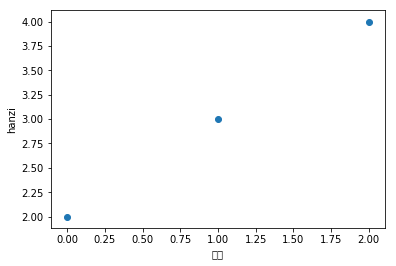

In [122]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['font.sans-serif']=['SimHei'] 
plt.rcParams['font.family']='sans-serif' 
# 用来正常显示负号
plt.rcParams['axes.unicode_minus']=False
x = [0,1,2]
y = [2,3,4]
plt.scatter(x,y)
plt.xlabel("汉字")
plt.ylabel('hanzi')
plt.show()

In [134]:
import pickle
import xgboost as xgb

import numpy as np
from sklearn.model_selection import KFold, train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, mean_squared_error
from sklearn.datasets import load_iris, load_digits, load_boston

rng = np.random.RandomState(31337)

print("Boston Housing: regression")
boston = load_boston()
y = boston['target']
X = boston['data']

import pandas as pd
X = pd.DataFrame(X)
y = pd.DataFrame(y)

kf = KFold(n_splits=2, shuffle=True, random_state=rng)
for train_index, test_index in kf.split(X):
    xgb_model = xgb.XGBRegressor().fit(X[train_index], y[train_index])
    predictions = xgb_model.predict(X[test_index])
    actuals = y[test_index]
    print(mean_squared_error(actuals, predictions))

Boston Housing: regression


KeyError: '[ 13  14  17  20  22  23  24  26  27  28  31  35  37  39  40  41  43  44\n  47  49  50  51  52  59  60  61  62  63  64  65  66  67  71  74  76  77\n  78  80  82  84  85  89  93  94  95  96  97 100 103 104 105 106 108 109\n 112 115 116 120 123 124 127 128 129 130 132 133 134 136 137 138 140 143\n 144 147 148 150 151 153 155 157 158 159 161 167 168 172 181 182 183 185\n 187 189 191 193 194 196 198 199 201 203 204 206 207 209 212 213 214 217\n 222 226 228 229 231 233 238 239 243 245 246 247 250 251 253 257 258 259\n 260 261 264 266 272 274 275 276 278 279 280 281 282 287 290 291 292 293\n 297 303 307 308 309 310 312 314 315 316 317 321 322 325 326 327 328 329\n 331 333 335 336 343 346 348 349 352 353 355 356 359 360 361 362 363 373\n 381 382 385 386 388 390 391 392 398 399 400 401 403 408 409 410 411 412\n 414 415 416 417 418 419 422 424 426 428 431 432 434 435 437 438 439 440\n 441 443 444 445 452 453 456 457 459 460 461 463 466 468 469 470 471 475\n 476 477 480 481 486 487 488 489 490 493 495] not in index'

In [136]:
np.array(X)

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [133]:
X

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [142]:
import pandas as pd
df1=pd.DataFrame({'key':['a','b','b'],'data1':range(3)})
 
df2=pd.DataFrame({'key':['a','b','c'],'data2':range(3)})
 
pd.merge(df1,df2)   #没有指定连接键，默认用重叠列名，没有指定连接方式

,key,data1,data2
0,a,0,0
1,b,1,1
2,b,2,1


In [139]:
df1

,key,data1
0,a,0
1,b,1
2,b,2


In [140]:
df2

,key,data2
0,a,0
1,b,1
2,c,2


In [144]:
from sklearn import datasets
import numpy as np
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score
iris = datasets.load_iris()
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

from sklearn.linear_model import Perceptron
ppn = Perceptron(n_iter=40, eta0=0.1, random_state=0)
ppn.fit(X_train_std, y_train)

y_pred = ppn.predict(X_test_std)
print(accuracy_score(y_test, y_pred))

def percept(args):
    global X_train_std,y_train,y_test
    ppn = Perceptron(n_iter=int(args["n_iter"]),eta0=args["eta"]*0.01,random_state=0)
    ppn.fit(X_train_std, y_train)
    y_pred = ppn.predict(X_test_std)
    return -accuracy_score(y_test, y_pred)

from hyperopt import fmin,tpe,hp,partial
space = {"n_iter":hp.choice("n_iter",range(30,50)),
         "eta":hp.uniform("eta",0.05,0.5)}
algo = partial(tpe.suggest,n_startup_jobs=10)
best = fmin(percept,space,algo = algo,max_evals=100)
print(best)
print(percept(best))

/home/wujiaocan/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/home/wujiaocan/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


0.8222222222222222


/home/wujiaocan/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/home/wujiaocan/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/home/wujiaocan/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/home/wujiaocan/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/home/wujiaocan/anaconda3/li

/home/wujiaocan/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/home/wujiaocan/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/home/wujiaocan/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/home/wujiaocan/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/home/wujiaocan/anaconda3/li

{'eta': 0.4629197473133194, 'n_iter': 3}
-0.9333333333333333


/home/wujiaocan/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/home/wujiaocan/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/home/wujiaocan/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/home/wujiaocan/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/home/wujiaocan/anaconda3/li

In [145]:
from sklearn import preprocessing
import numpy as np
X = np.array([[ 1., -1.,  2.],
              [ 2.,  0.,  0.],
              [ 0.,  1., -1.]])
X_scaled = preprocessing.scale(X)                

In [146]:
X_scaled

array([[ 0.        , -1.22474487,  1.33630621],
       [ 1.22474487,  0.        , -0.26726124],
       [-1.22474487,  1.22474487, -1.06904497]])

In [166]:
import pandas as pd
import numpy as np
df1 = pd.DataFrame([[1,2,3],
                    [2,3,4],
                    [3,4,5]])
df2 = pd.DataFrame([[1,1,1],
                    [2,2,2,],
                    [3,3,3]])
# pd.merge(df1,df2,left_on='lkey',right_on='rkey')

In [167]:
df1.columns=['column1','column2','column3']
df2.columns=['column4','column5','column3']

In [168]:
df1.index = ['a','b','c']
df2.index = ['b','c','d']

In [173]:
pd.merge(df1,df2,on="column3")

,column1,column2,column3,column4,column5
0,1,2,3,3,3


In [182]:
import pandas as pd
import numpy as np

#定义资料集
df1 = pd.DataFrame(np.ones((3,4))*0, columns=['a','b','c','d'])
df2 = pd.DataFrame(np.ones((3,4))*1, columns=['e','f','g','h'])
df3 = pd.DataFrame(np.ones((3,4))*2, columns=['i','j','k','l'])

#concat纵向合并
res = pd.concat([df1, df2, df3], axis=1)
# df3

In [183]:
res

,a,b,c,d,e,f,g,h,i,j,k,l
0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0
1,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0
2,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0
